# Using the K-Nearest Neighbours Algorithm on the Digits Dataset

The k-Nearest Neighbours (k-NN) algorithm is an extremely simple supervised-learning algorithm. The positions of the features in some multi-dimensional feature space and the labels are stored in the training phase. When classifying a new sample, the k closest samples are identified by their Euclidean distance, and the new sample is assigned the label that has the greatest representation amongst the identified nearest neighbours. In this simple example, we will use the k-NN algorithm on the digits dataset. Each sample in the dataset consists of 64 features, each of which represents a grayscale pixel value from an 8 x 8 grid. 

We begin with loading the dataset and viewing one of the samples as an image.

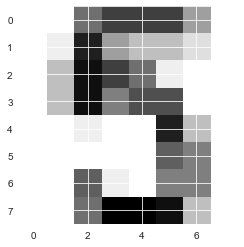

In [29]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns

# load the digits dataset, which is of type Bunch, similar to dictionaries
digits = datasets.load_digits()

# view the 1111 image in the dataset of 1797
# the image is 8 x 8 pixels
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

This sample represents the number 5.

Assign the features and the target to X and y respectively, and split into training and testing sets.

In [30]:
# X data has the dicitonary key 'data'
X = digits['data']
# y data has the dictionary key 'target'
y = digits['target']

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

Now we can create the k-NN classifier, fit to the training data and evaluate on the test set.

In [31]:
# create the k-NN classifier with 7 nearest neighbours
knn = KNeighborsClassifier(n_neighbors = 7)
# fit to the training data
knn.fit(X_train, y_train)
# score the model on the test data
print('Model accuracy: {:.2f}'.format(knn.score(X_test, y_test)))

Model accuracy: 0.98


Let's see how the performance of the model is affected by the number of nearest neighbours specified.

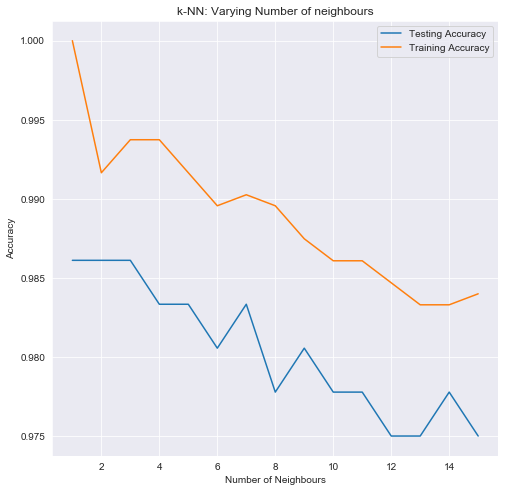

In [32]:
# create arrays to store train and test accuracies
neighbours = np.arange(1, 16)
train_accuracy = np.empty(len(neighbours))
test_accuracy = np.empty(len(neighbours))

# trial with different values of k, from 1 to 15
for i, k in enumerate(neighbours):
    # create the classifier
    knn1 = KNeighborsClassifier(n_neighbors = k)
    # fit to training data
    knn1.fit(X_train, y_train)
    # compute accuracy on the training set and assign to 'train_accuracy'
    train_accuracy[i] = knn1.score(X_train, y_train)
    # compute accuracy on the test set and assign to 'test_accuracy'
    test_accuracy[i] = knn1.score(X_test, y_test)

# generate plot
sns.set_style('darkgrid')
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111)
ax.set_title('k-NN: Varying Number of neighbours')
ax.plot(neighbours, test_accuracy, label = 'Testing Accuracy')
ax.plot(neighbours, train_accuracy, label = 'Training Accuracy')
ax.legend()
ax.set_xlabel('Number of Neighbours')
ax.set_ylabel('Accuracy')
plt.show()

We have obvious overfitting at $k=1$. Choosing $k$ is not a simple decision; a general rule of thumb is to choose $k = \sqrt n $, where $n$ is the number of samples.